In [31]:
import xarray as xr
import rioxarray

ds = xr.open_dataset('../datasets/ww3_72_east_coast_2022041112.nc')
ds

<xarray.Dataset>
Dimensions:                  (longitude: 381, latitude: 351, time: 73,
                              forecast_reference_time: 1)
Coordinates:
  * longitude                (longitude) float32 -93.0 -92.9 ... -55.1 -55.0
  * latitude                 (latitude) float32 20.0 20.1 20.2 ... 54.9 55.0
  * time                     (time) datetime64[ns] 2022-04-11T12:00:00 ... 20...
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 2022-04...
Data variables: (12/21)
    hs                       (forecast_reference_time, time, latitude, longitude) float32 ...
    t02                      (forecast_reference_time, time, latitude, longitude) float32 ...
    t0m1                     (forecast_reference_time, time, latitude, longitude) float32 ...
    t01                      (forecast_reference_time, time, latitude, longitude) float32 ...
    fp                       (forecast_reference_time, time, latitude, longitude) float32 ...
    dir                      (forecast_reference_time, time, latitude, longitude) float32 ...
    ...                       ...
    pdir2                    (forecast_reference_time, time, latitude, longitude) float32 ...
    pws0                     (forecast_reference_time, time, latitude, longitude) float32 ...
    pws1                     (forecast_reference_time, time, latitude, longitude) float32 ...
    pws2                     (forecast_reference_time, time, latitude, longitude) float32 ...
    tws                      (forecast_reference_time, time, latitude, longitude) float32 ...
    pnr                      (forecast_reference_time, time, latitude, longitude) float32 ...
Attributes: (12/16)
    WAVEWATCH_III_version_number:     5.16
    WAVEWATCH_III_switches:           F90 SHRD NOGRB NOPA LRB4 NC4 TRKNC PR3 ...
    SIN4 namelist parameter BETAMAX:  1.65
    product_name:                     ww3.20220411.nc
    area:                             NW Atlantic  6 arc min grd2
    latitude_resolution:              0.1000000
    ...                               ...
    easternmost_longitude:            -55.00000
    minimum_altitude:                 -12000 m
    maximum_altitude:                 9000 m
    altitude_resolution:              n/a
    start_date:                       2022-04-11 12:00:00
    stop_date:                        2022-04-11 23:00:00

In [32]:
ds.rio.write_crs(4326, inplace=True)

q = ds.sel({'latitude': slice(40, 42), 'longitude': slice(-72, -70)})
q

<xarray.Dataset>
Dimensions:                  (longitude: 21, latitude: 21, time: 73,
                              forecast_reference_time: 1)
Coordinates:
  * longitude                (longitude) float32 -72.0 -71.9 ... -70.1 -70.0
  * latitude                 (latitude) float32 40.0 40.1 40.2 ... 41.9 42.0
  * time                     (time) datetime64[ns] 2022-04-11T12:00:00 ... 20...
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 2022-04...
    spatial_ref              int64 0
Data variables: (12/21)
    hs                       (forecast_reference_time, time, latitude, longitude) float32 ...
    t02                      (forecast_reference_time, time, latitude, longitude) float32 ...
    t0m1                     (forecast_reference_time, time, latitude, longitude) float32 ...
    t01                      (forecast_reference_time, time, latitude, longitude) float32 ...
    fp                       (forecast_reference_time, time, latitude, longitude) float32 ...
    dir                      (forecast_reference_time, time, latitude, longitude) float32 ...
    ...                       ...
    pdir2                    (forecast_reference_time, time, latitude, longitude) float32 ...
    pws0                     (forecast_reference_time, time, latitude, longitude) float32 ...
    pws1                     (forecast_reference_time, time, latitude, longitude) float32 ...
    pws2                     (forecast_reference_time, time, latitude, longitude) float32 ...
    tws                      (forecast_reference_time, time, latitude, longitude) float32 ...
    pnr                      (forecast_reference_time, time, latitude, longitude) float32 ...
Attributes: (12/16)
    WAVEWATCH_III_version_number:     5.16
    WAVEWATCH_III_switches:           F90 SHRD NOGRB NOPA LRB4 NC4 TRKNC PR3 ...
    SIN4 namelist parameter BETAMAX:  1.65
    product_name:                     ww3.20220411.nc
    area:                             NW Atlantic  6 arc min grd2
    latitude_resolution:              0.1000000
    ...                               ...
    easternmost_longitude:            -55.00000
    minimum_altitude:                 -12000 m
    maximum_altitude:                 9000 m
    altitude_resolution:              n/a
    start_date:                       2022-04-11 12:00:00
    stop_date:                        2022-04-11 23:00:00

In [33]:
q['hs']

<xarray.DataArray 'hs' (forecast_reference_time: 1, time: 73, latitude: 21,
                        longitude: 21)>
array([[[[0.332738, ..., 0.458285],
         ...,
         [     nan, ..., 0.434146]],

        ...,

        [[1.380051, ..., 1.182835],
         ...,
         [     nan, ..., 0.763778]]]], dtype=float32)
Coordinates:
  * longitude                (longitude) float32 -72.0 -71.9 ... -70.1 -70.0
  * latitude                 (latitude) float32 40.0 40.1 40.2 ... 41.9 42.0
  * time                     (time) datetime64[ns] 2022-04-11T12:00:00 ... 20...
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 2022-04...
    spatial_ref              int64 0
Attributes:
    long_name:      significant height of wind and swell waves
    standard_name:  sea_surface_wave_significant_height
    globwave_name:  significant_wave_height
    units:          m
    valid_min:      0
    valid_max:      32000

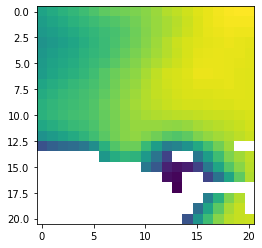

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(q['hs'][0][0])

In [35]:

q['hs'].rio.width

21

In [36]:
q['hs'].shape

(1, 73, 21, 21)

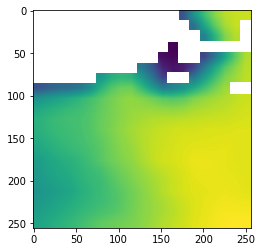

In [40]:
region_hs_data = q['hs'][0]

from rasterio.enums import Resampling

resampled_hs_data = region_hs_data.rio.reproject(
    ds['hs'].rio.crs, 
    shape=(256, 256), 
    resampling=Resampling.bilinear,
)

plt.imshow(resampled_hs_data[0])